# Ford GoBike Sharing System Usage
## by Jaslin Kaur Sandhu

## Investigation Overview

Ford's GoBike was launched across the San Franciso Bay Area and is available to all residents using either physical Bay Area transit Clipper cards or the Ford GoBike app. Begining in August 2013, Bay Wheels system had over 2600 bicycles in 262 stations across San Francisco, East Bay and San Jose.
The Bay Wheels fleet consists of two kinds of bicycles: a "Classic" docked model with a step through frame and a hybrid which is an electrical-assist model that can be parked at a dock or used in a dockless manner. 
These bicycles are readily available 24 hours a day, 365 days a year and customers can choose from a single ride or to subscribe to an annual membership.
This visualization and exploration of this study mainly focuses on the bike duration usage pattern between Customers and Subsribers.

## Dataset Overview

The dataset used for this explanatory analysis consists of trip data in a CSV format. Visualizations below are created frm wrangled and cleaned data to facilitate and discover on usage patterns of different user types and the duration of their usage.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv');
#df_1 = pd.read_csv('clean_master_file3.csv');

#Remove rows have null values
df_clean = df.dropna()
df_clean.isnull().sum()

#Change Start Time & End Time data format to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

#Extracting hours and day of the week from start time 
df_clean['start_hour'] = df_clean['start_time'].dt.hour
df_clean['start_day'] = df_clean['start_time'].dt.strftime('%a')

#Converting the day of the week to a category
weekdays = ['Mon' , 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_clean['start_day'] = df_clean['start_day'].astype(ordered_weekdays)

#Covert Duration to Minutes
df_clean['duration_min'] = df_clean['duration_sec']/60

#To remove the long tail of the distribution
df_clean = df_clean[df_clean['duration_min'] <= 100]

#Creating an age data
df_clean['age'] = 2021 - df['member_birth_year']

#Taking data for 60 years and below - explanation on why is in the exploration
df_clean = df_clean[df_clean['age'] <= 60]

#Convert float values into INT as for age and birth year it should be int values.
df_clean['age'] = df_clean['age'].astype(int)
df_clean['duration_min'] = df_clean['duration_min'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169304 entries, 4 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             169304 non-null  int64         
 1   start_time               169304 non-null  datetime64[ns]
 2   end_time                 169304 non-null  datetime64[ns]
 3   start_station_id         169304 non-null  float64       
 4   start_station_name       169304 non-null  object        
 5   start_station_latitude   169304 non-null  float64       
 6   start_station_longitude  169304 non-null  float64       
 7   end_station_id           169304 non-null  float64       
 8   end_station_name         169304 non-null  object        
 9   end_station_latitude     169304 non-null  float64       
 10  end_station_longitude    169304 non-null  float64       
 11  bike_id                  169304 non-null  int64         
 12  user_type       

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Amount of Customers vs the Number of Subscribers

Based on the data, we can intially analyze that the amount of customers are relatively higher than the number of Customers.

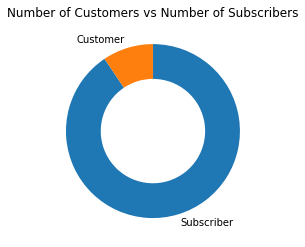

In [3]:
counts = df_clean['user_type'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});
plt.title("Number of Customers vs Number of Subscribers");

## Average Weekday Trip Duration for Customers and Subsribers

It is identified that, users of the average age of 25 to 40 use the bike sharing the most. In addition to that, based on the graph, the average trip duration of the users are mainly for 20 mins which is short term rentals although there have been long term rentals identified up to 100 minutes.

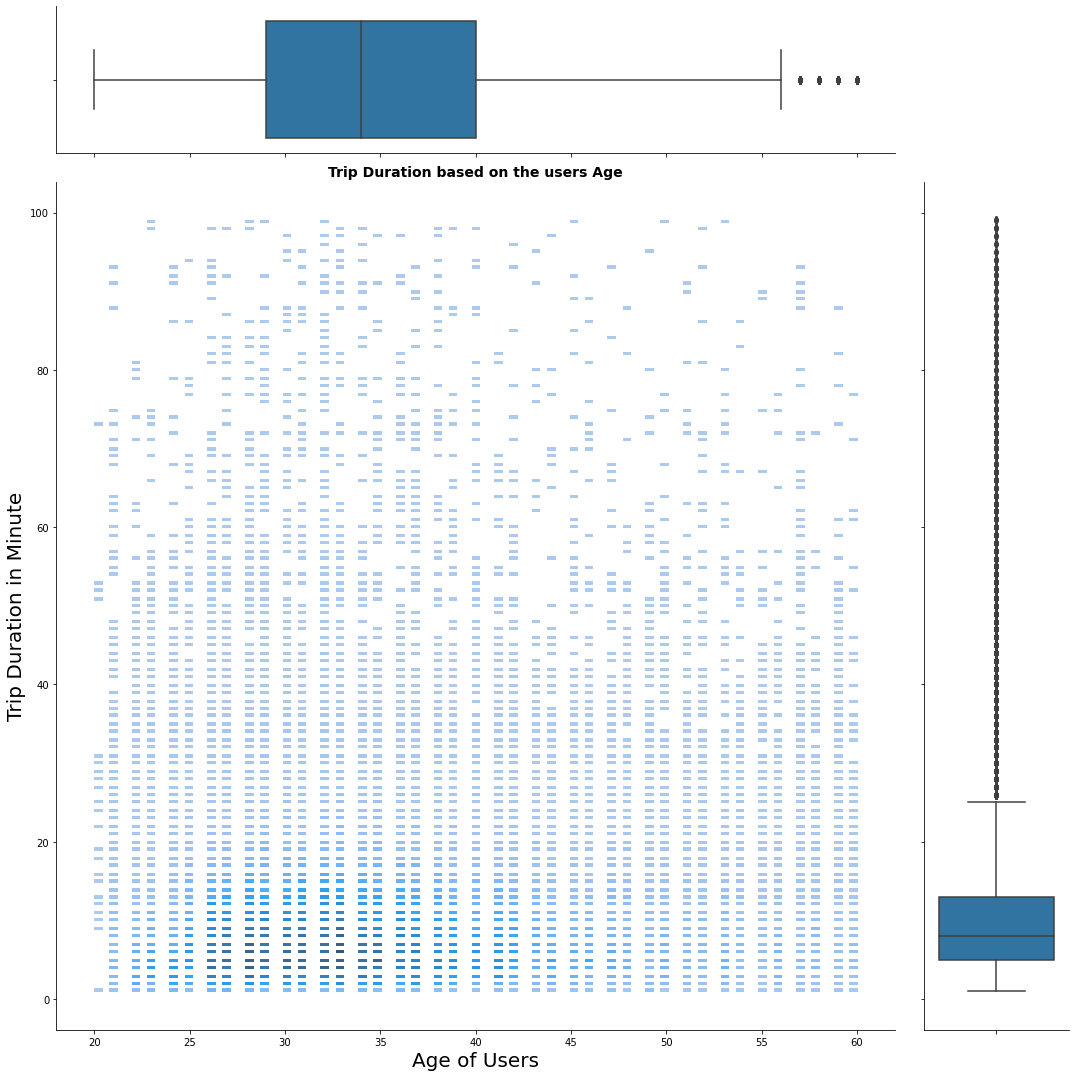

In [4]:
g = sb.JointGrid(data=df_clean, x="age", y="duration_min", height=15,marginal_ticks=True);
g.plot_joint(sb.histplot);
g.plot_marginals(sb.boxplot);
g.ax_joint.set_xlabel('Age of Users', fontsize=20);
g.ax_joint.set_ylabel('Trip Duration in Minute', fontsize=20);
g.ax_joint.set_title('Trip Duration based on the users Age', fontsize=14, fontweight='semibold');

## Hourly usage for Customers and Subsribers 

Different patterns can be seen for the usage of the rental bikes for Subsribers and Customers. Subsribers are long term reoccuring customers of the Ford GoBike rental, and they tend to use the bike system mainly on weekdays ie. Monday through Friday at specifically at rush hour which would range from 7 AM to 9 AM and 4 PM to 6 PM. Hence, it can be deduced that, the Subsriber user type is mainly working individuals. On the contrary, Customers which could be non long term customers tend to use the bike rental system on weekdays but mainly on weekends ie. Saturday and Sundays for leisure purposes

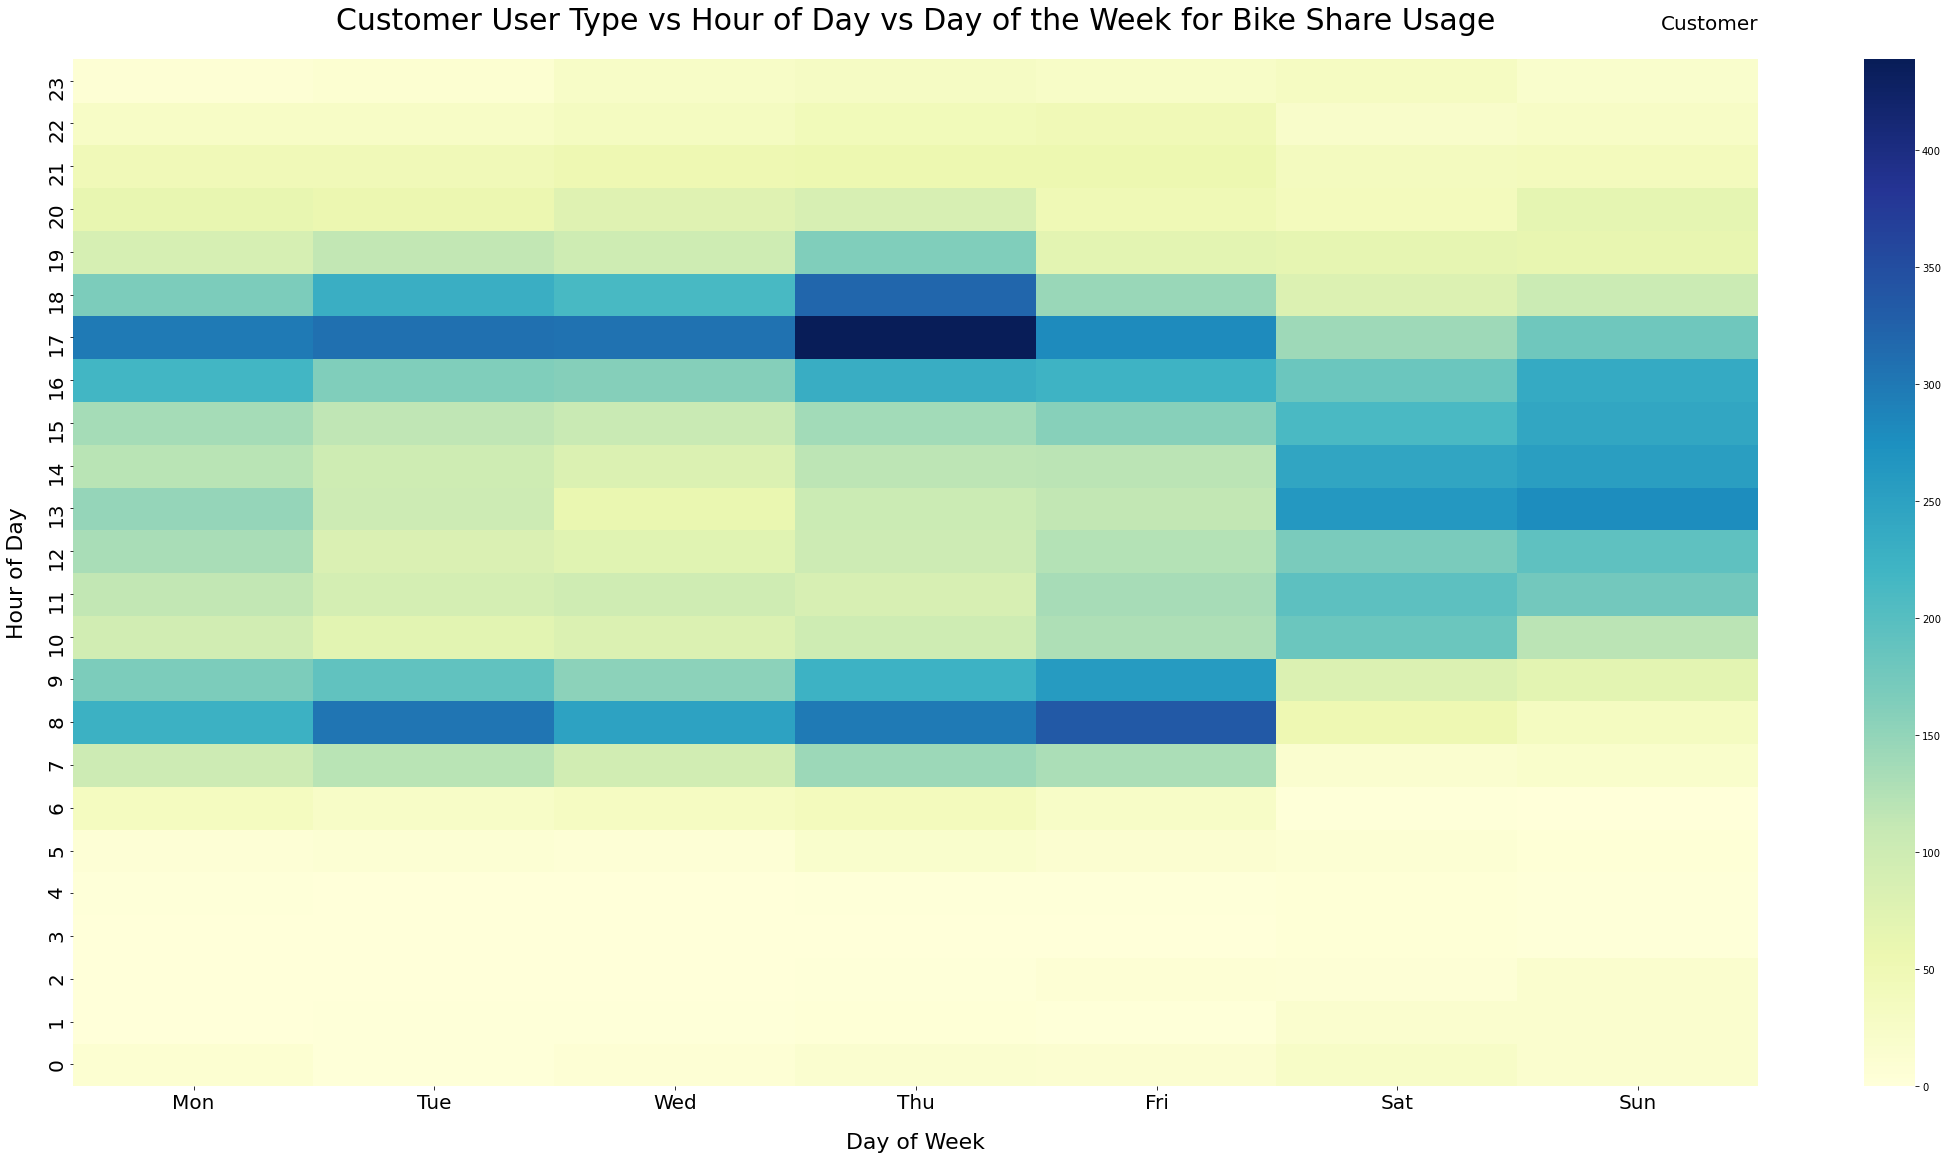

In [5]:
fig, ax = plt.subplots(figsize=(30,15))

#Query for Customer Related Data against the bike id 
customers = df_clean.query('user_type == "Customer"').groupby(['start_hour', 'start_day'])["bike_id"].size().reset_index()
customers = customers.pivot('start_hour', 'start_day', 'bike_id')

#Plotting Heatmap
sb.heatmap(customers,  cmap="YlGnBu");

#To ensure the hours start at 0 to 24
ax.invert_yaxis()

#Graph labels
plt.tight_layout()
plt.title('Customer', loc='right', fontsize=20);
plt.xlabel('Day of Week', fontsize=22, labelpad=20);
plt.ylabel('Hour of Day', fontsize=22, labelpad=20);
plt.title('Customer User Type vs Hour of Day vs Day of the Week for Bike Share Usage',  fontsize=30, pad=30);
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 20);
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 20);

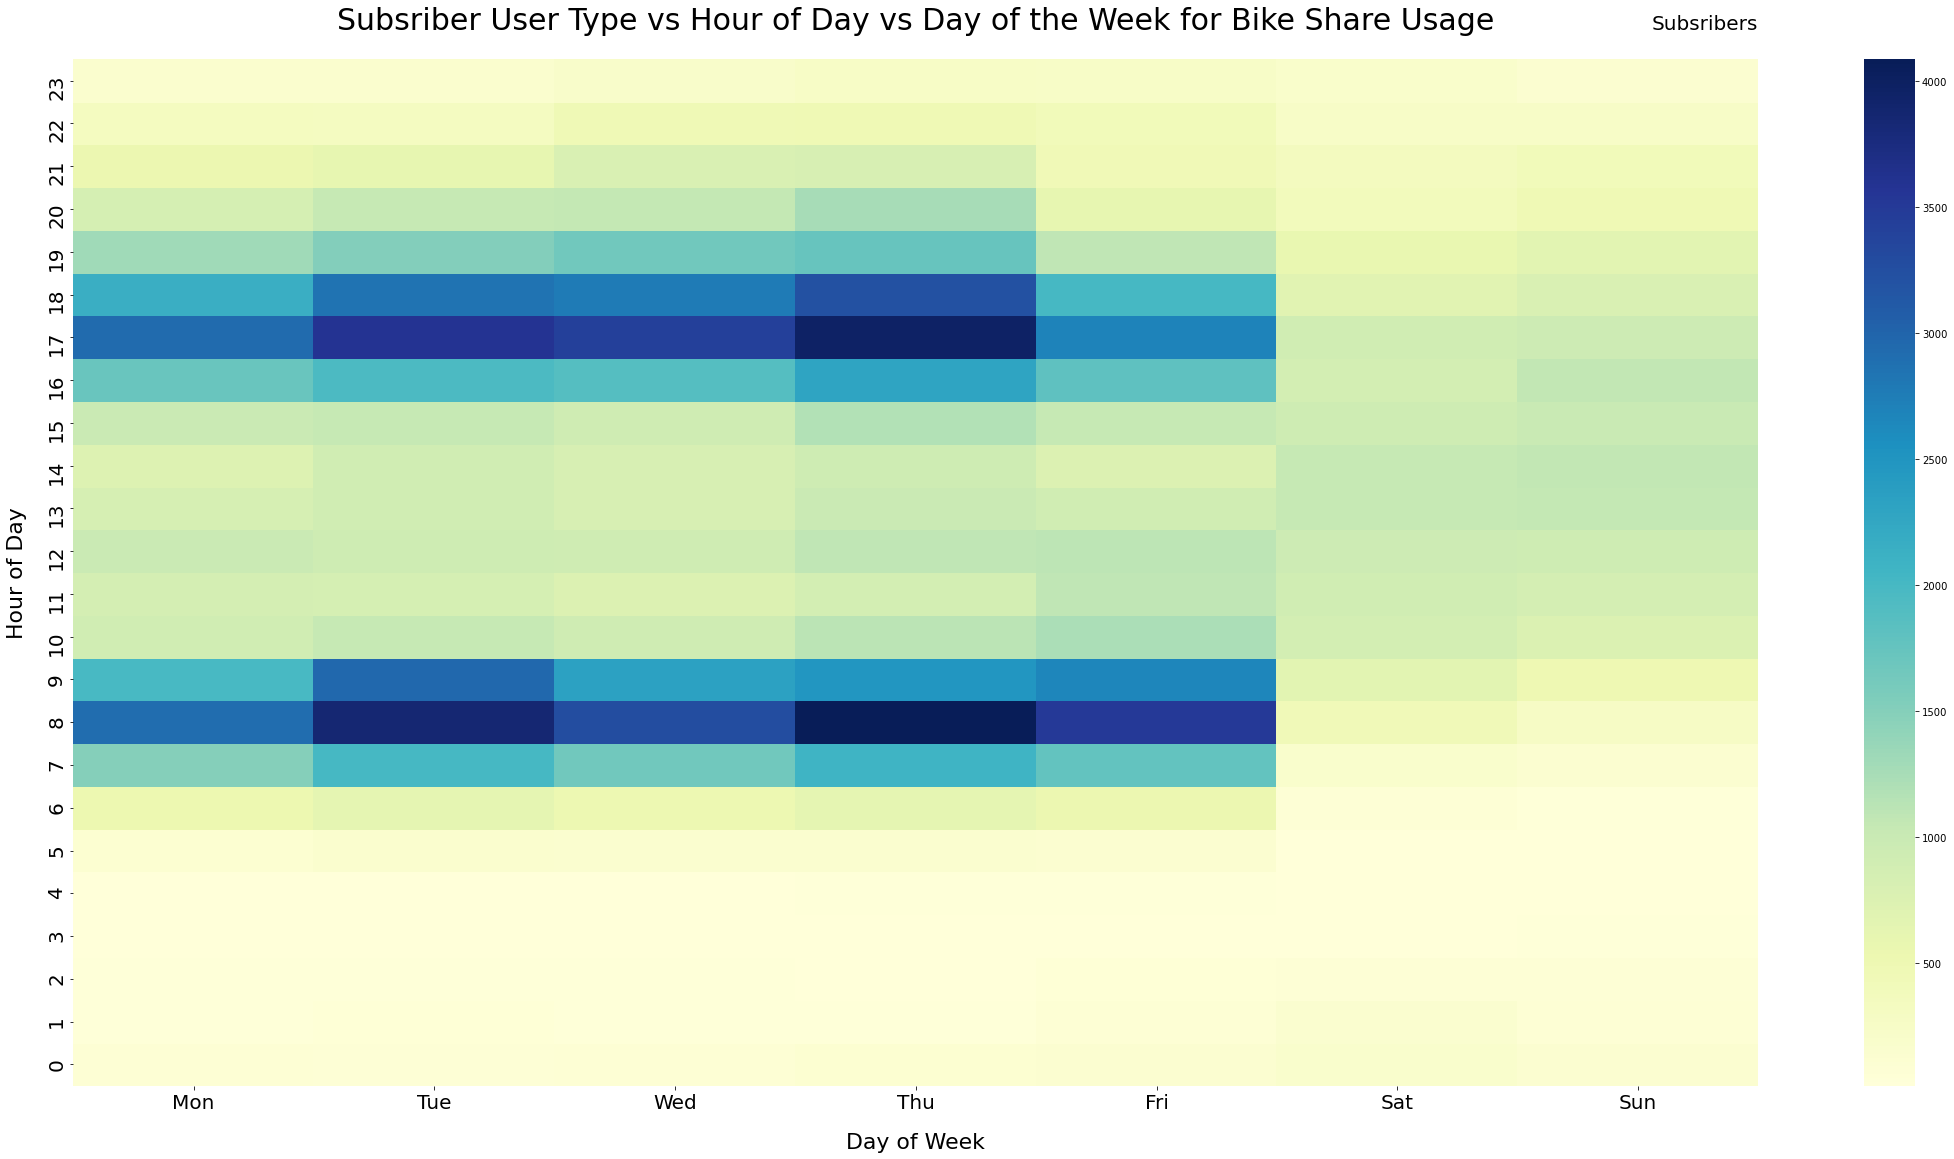

In [6]:
#SUBSRIBERS

fig, ax = plt.subplots(figsize=(30,15))

#Query for Subsriber Related Data
subscribers = df_clean.query('user_type == "Subscriber"').groupby(['start_hour', 'start_day'])["bike_id"].size().reset_index()
subscribers = subscribers.pivot('start_hour', 'start_day', "bike_id")

#Plotting Heatmap
sb.heatmap(subscribers,  cmap="YlGnBu");

#To ensure the hours start at 0 to 24
ax.invert_yaxis()

#Graph labels
plt.tight_layout()
plt.title('Subsribers', loc='right', fontsize=20);
plt.xlabel('Day of Week', fontsize=22, labelpad=20);
plt.ylabel('Hour of Day', fontsize=22, labelpad=20);
plt.title('Subsriber User Type vs Hour of Day vs Day of the Week for Bike Share Usage',  fontsize=30, pad=30)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 20);
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 20);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!